# Final Project Abstract - Lab 7

Bella Conrad (Colorado State University)  
Zachary Cramton (Colorado State University)  
Rachel Delorie (Colorado State University)

# Urbanization, Density and Access to Public Parks in the United States

## Abstract

### Introduction

Since 2008, the majority of the world’s population has lived in urban areas, a result of urbanization in developing countries ([Beall et al., 2010](#ref-beall2010urbanization); [Kohlhase, 2013](#ref-kohlhase2013new)). The United States developed earlier than many nations, with more than 50 percent of the population living in urban areas.

> **Definition of Urban Areas in Census History**
>
> Prior to the 2020 Census urban areas were defined as any area with greater than 2500 people. Following the 2010 census urban clusters described areas with populations greater than 2,500 and less than 50,000; urbanized areas described areas with a population greater than 50,000. For the 2020 Census the threshold was changed to 5000 people ([Ratcliffe, 2022](#ref-ratcliffe_redefining_2022)).

by the 14th Census in 1920. In the century since the 1920 census the percentage of individuals living in urban areas has increased to 80.7% ([Slack & Jensen, 2020](#ref-slack2020changing)). As more people moved to urban areas, those areas expanded forming urbanized areas and large cities.

Urban planning has existed for centuries out of necessity, historically dominated by efficiency and utilitarianism, optimizing the world we live in for profitability, corporate productivity, and automobile-based mobility. This optimization came with sacrifices, which now impact an increasingly large majority of the population. In recent years, the discipline has begun to prioritize human factors over utilitarian efficiency. Thousands of years of living in rural settings makes urban living hard for most people’s biology. Connection to nature and time outdoors even in small amounts has been shown to be a vital part maintaining physical and mental health \[DOTHIS:: Find additional source\]. In an effort to make urban spaces more livable, planners are turning to parks and natural areas to connect people to nature.

Equity issues aside, overturning and correcting more than a century of bad planning is a daunting task. Many cities filled in and built up over the course of the 20th century as land became a premium commodity \[DOTHIS:: Find additional source\]. Does this density present significant challenges for today’s planning professionals? This research seeks to investigate the relationship between urban demographics like density and park access. In exploring this relationship, we hypothesize that there is an intermediate/sublinear relationship between urban population density and public open space availability.

### Data Overview

This report uses data from the UN-Habitat Urban Indicators Database and the ParkServe® Database maintained by the Trust for Public Land. The UN data relates to the UN-SDG 11.7.1 pertaining to access to open spaces and green areas.

The January 2025 version of the UN Open Spaces and Green Areas data includes the average share of urban areas allocated to streets and open public spaces as well as the share of the urban population with convenient access to an open public space.

> **UN Definition**
>
> In this case, the UN defines “convenient access to an open public space” as the “urban population withing 400 meters walking distance along the street network to an open public space” ([May et al., 2000](#ref-may2000habitat)).

These data collected by the UN were collected in 2020 and provided as a .xls format spreadsheet. These data were converted to .csv format with Microsoft Excel. The ParkServe® data selected for use is the 2020 data set to match the year the UN data was recorded. Specifically, this report uses elements of the City Park Facts: Acreage & Park System Highlights. The ParkServe® data is much less synthesized and was available as a .xml file. The file was structured for viewing as a spreadsheet rather than for further analysis and included multiple worksheets withing the workbook. In converting the file to a .csv file, the data spread across multiple worksheets was collated in a single worksheet and converted to a summarized dataset .csv file.

These data are lacking a shared numerical position data type but share a city name column formatted as “city_name, two_letter_state_abbreviation”. There is not perfect overlap between cities with data in each database however, there are 25 cities shared between the datasets. Cities present in only one data set will be culled when the data is joined.

### Methods

1.  Clean the data. The raw data were downloaded as Excel spreadsheets, some reformatting in Excel was required to effectively exporting as a .csv file and importing the new summarized file to RStudio. Remaining data cleaning will occur in R as needed including any header changes or additional columns needed.
2.  Conduct Exploratory Data Analysis (EDA).
3.  Join datasets by “city name” to have a complete working dataset. These data will be combined into a single data frame with an inner join because there is a large number of cities listed in one data set but not the other. The new dataset will include only cities found in both datasets, with columns from both.

> **Limiting Scope**
>
> The cities found in only one dataset will be cut from the data to accommodate the limited scope of the project. With a bigger scope it is possible that additional data could be used to understand these patterns with more depth.

1.  Prep data and split it into training and testing datasets. Perform a 10-fold cross-validation on training data.
2.  Create a recipe.
3.  Set up several models in regression mode.
4.  Create a workflow set including the previously written models and the recipe.
5.  Map function over workflow using workflow map.
6.  Using the highest performing model, fit the data and augment.
7.  Plot and graph data to visually display test results.
8.  Explore using the model to predict values for cities included in only one document (if time allows).

## Exploratory Data Analysis (EDA)

The data has already been discussed in general terms in the data overview section. There will be a readme file created to elaborate on the sources, formatting and manipulation required for each dataset before joining them into the urban_parks_data data frame. In general terms, prior to importing into RStudio, the .xml files the data came in were opened in MS Excel; the sheets were formatted to be converted to .csv files including condensing multiple worksheets of the ParkServe® data into a sinigle sheet for easier conversion to a .csv file. While some of the cleaning done in Excel could have been completed in RStudio, it was not efficient to do so. Using Excel was faster and more flexible for that use case. Similar reformatting was required with the UN data as the headers were unreasonably long by default. The readme that will be created for each (or both) files will include a more detailed summary of what each variable means.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

here() starts at C:/Users/Zacha/github/CSU/ESS 330/ess_330_project_proposal


Attaching package: 'flextable'

The following object is masked from 'package:purrr':

    compose

Rows: 100 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): city_name, city_pop, land_area, revised_area, percent_designed_par...
dbl  (5): parkland_area, designed_park_area, natural_park_area, parkland_per...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 59 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): city_name
dbl (2): mean_percent_built_open_space, mean_percent_open_space_access

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 25
Columns: 18
$ city_name                      <chr> "Anchorage, AK", "Atlanta, GA", "Boston…
$ city_pop                       <dbl> 299100, 498059, 687725, 2744859, 377963…
$ land_area                      <dbl> 1090997, 85217, 30897, 145686, 49726, 2…
$ revised_area                   <dbl> 1086019, 84250, 29175, 136796, 46880, 2…
$ parkland_area                  <dbl> 914138, 5293, 5072, 13609, 3170, 20352,…
$ designed_park_area             <dbl> 2417, 3864, 2556, 8593, 1792, 10974, 40…
$ natural_park_area              <dbl> 911721, 1429, 2516, 4430, 1378, 9378, 1…
$ parkland_percent               <dbl> 84.173297, 6.282493, 17.384747, 9.94839…
$ percent_designed_parks         <dbl> 0.2644021, 73.0020782, 50.3943218, 63.1…
$ percent_natural_parks          <dbl> 99.735598, 26.997922, 49.605678, 32.551…
$ pop_density                    <dbl> 0.28, 5.91, 23.57, 20.07, 8.06, 6.39, 7…
$ parkland_per_1k_pop            <dbl> 3056.295553, 10.627255, 7.375041, 4.744…
$ park_units       

Variable,Mean,Median,Standard Deviation,1st Quartile (Q1),3rd Quartile (Q3)
city_pop,"1,113,559.56","655,061.00","1,696,534.55","377,963.00","1,006,142.00"
designed_park_area,"5,559.20","3,864.00","5,020.97","2,652.00","5,785.00"
dn_area_ratio,2.42,1.02,4.90,0.26,1.56
land_area,"178,285.40","88,800.00","224,466.29","53,723.00","201,635.00"
mean_percent_built_open_space,18.71,18.20,3.23,17.20,20.60
mean_percent_open_space_access,42.06,40.00,17.04,29.80,52.80
natural_park_area,"48,113.72","4,538.00","180,621.84","1,429.00","22,527.00"
park_units,460.80,302.00,811.06,179.00,416.00
park_units_per_10k_pop,4.55,4.54,1.72,3.28,5.42
parkland_area,"53,824.36","9,478.00","180,158.96","5,075.00","28,312.00"


City Name,City Population,City Land Area (Revised) (Acres),Population Density (People/Acre),City Parkland Area (Acres),Designed-Natural Park Area Ratio (Designed Park (%) / Natural Park (%),Percent Parkland,Parkland Per (1000) Capita,Percent of Residents within 0.5 Miles of a Park
"Anchorage, AK","299,100","1,086,019",0.28,"914,138",0.00,84.17,"3,056.30",0.75
"New Orleans, LA","386,105","107,655",3.59,"27,775",0.11,25.80,71.94,0.80
"Washington, DC","702,321","38,955",18.03,"9,478",1.09,24.33,13.50,0.98
"New York, NY","8,627,852","187,946",45.91,"40,190",1.01,21.38,4.66,0.99
"San Diego, CA","1,399,844","205,918",6.80,"39,385",0.29,19.13,28.14,0.81
"Virginia Beach, VA","457,832","159,341",2.87,"28,312",0.26,17.77,61.84,0.68
"Boston, MA","687,725","29,175",23.57,"5,072",1.02,17.38,7.38,1.00
"Honolulu, HI","1,006,142","379,885",2.65,"57,141",0.09,15.04,56.79,0.79
"Minneapolis, MN","421,339","33,958",12.41,"5,075",8.47,14.94,12.04,0.98
"Jacksonville, FL","925,142","467,298",1.98,"67,707",0.14,14.49,73.19,0.35


City Name,City Population,City Land Area (Revised) (Acres),Population Density (People/Acre),City Parkland Area (Acres),Designed-Natural Park Area Ratio (Designed Park (%) / Natural Park (%),Percent Parkland,Parkland Per (1000) Capita,Percent of Residents within 0.5 Miles of a Park
"Durham, NC","275,758","68,678",4.02,"2,665",0.11,3.88,9.66,0.51
"Memphis, TN","655,061","196,098",3.34,"9,194",1.10,4.69,9.15,0.46
"Winston-Salem, NC","248,839","83,917",2.97,"4,263",7.34,5.08,17.13,0.37
"Detroit, MI","660,960","87,844",7.52,"5,102",3.63,5.81,7.72,0.80
"Toledo, OH","277,467","51,169",5.42,"3,175",1.41,6.20,11.44,0.81
"Atlanta, GA","498,059","84,250",5.91,"5,293",2.70,6.28,10.63,0.72
"Cleveland, OH","377,963","46,880",8.06,"3,170",1.30,6.76,8.39,0.83
"Dallas, TX","1,378,903","215,676",6.39,"20,352",1.17,9.44,14.76,0.71
"St. Louis, MO","310,144","39,090",7.93,"3,749",23.66,9.59,12.09,0.98
"Chicago, IL","2,744,859","136,796",20.07,"13,609",1.94,9.95,4.74,0.98


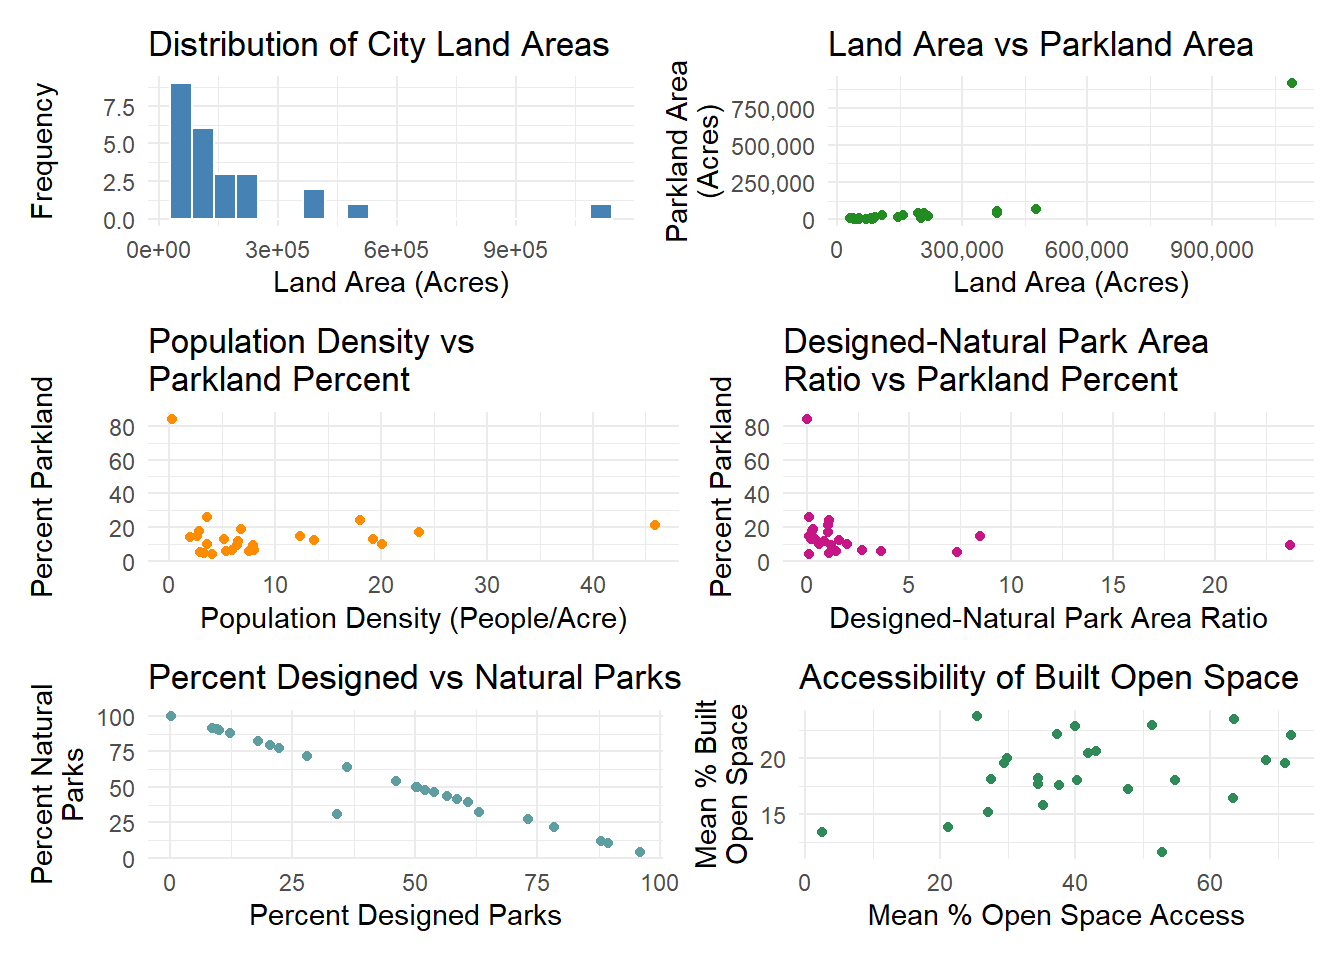

In [ ]:
library(tidyverse)

## References

Beall, J., Guha-Khasnobis, B., & Kanbur, R. (2010). *Urbanization and development: Multidisciplinary perspectives*. Oxford University Press.

Kohlhase, J. E. (2013). The new urban world 2050: Perspectives, prospects and problems. *Regional Science Policy & Practice*, *5*(2), 153–166.

May, R., Rex, K., Bellini, L., Sadullah, S., Nishi, E., James, F., & Mathangani, A. (2000). UN habitat indicators database: Evaluation as a source of the status of urban development problems and programs. *Cities*, *17*(3), 237–244.

Ratcliffe, M. (2022). Redefining Urban Areas following the 2020 Census. In *Census.gov*. <https://www.census.gov/newsroom/blogs/random-samplings/2022/12/redefining-urban-areas-following-2020-census.html>

Slack, T., & Jensen, L. (2020). The changing demography of rural and small-town america. *Population Research and Policy Review*, *39*(5), 775–783.